# <span style="color:rosybrown">Module-2</span>

# <span style="color:plum">Linear Regression Assignment</span>

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

##### The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
##### Goal:

- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

# Step - 1: Importing Libraries

In [ ]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Step2: Reading Dataset and Understanding Data

In [ ]:
# read the data
df = pd.read_csv("day (1).csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [ ]:
# Checking the shape of dataframe
df.shape

(730, 16)

In [ ]:
# describe the columns of dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# get the info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# Checking for nulls
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# Checkingb the size of data
df.size

11680

In [ ]:
# Checking the datatype of data
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
# Checking the dimensions of adta
df.ndim

2

There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.

# Step3: Cleaning Data

#### - instant columns contains index values only, not required
#### - We already have yr, months columns, so dteday in not required
#### - Our target variable is cnt, hence we can delete casual and registered columns

In [ ]:
# Droping instant column as it is index column which has nothing
df.drop('instant', axis=1, inplace=True)

In [ ]:
# dteday has date which can be compensated by year and month column,
df.drop('dteday', axis=1, inplace=True)

In [ ]:
# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column
df.drop('casual', axis=1, inplace=True)
df.drop('registered', axis=1, inplace=True)

In [ ]:
# Inspect data after dropping
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
# Checking data set
df.shape

(730, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Step4: EDA and Visualisation

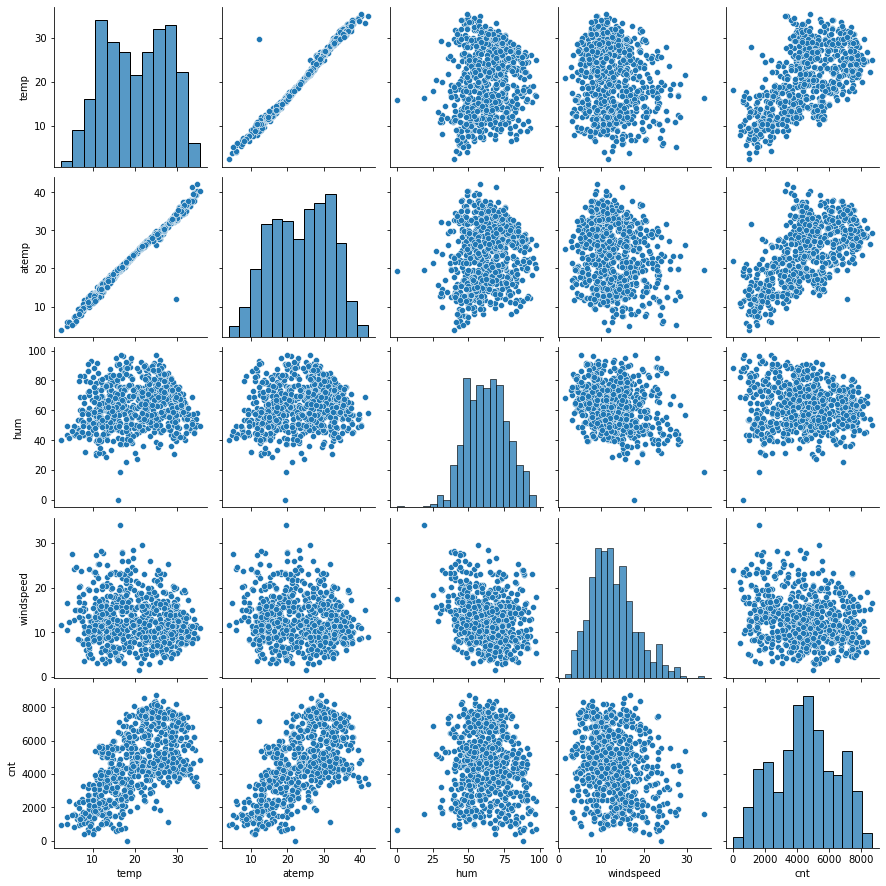

In [ ]:
# Pairplot of numerical variables
sns.pairplot(df, vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

#### Insights:
- There is linear relationship between temp and atemp.
- There is some positive linear trend between temp-cnt and atemp-cnt

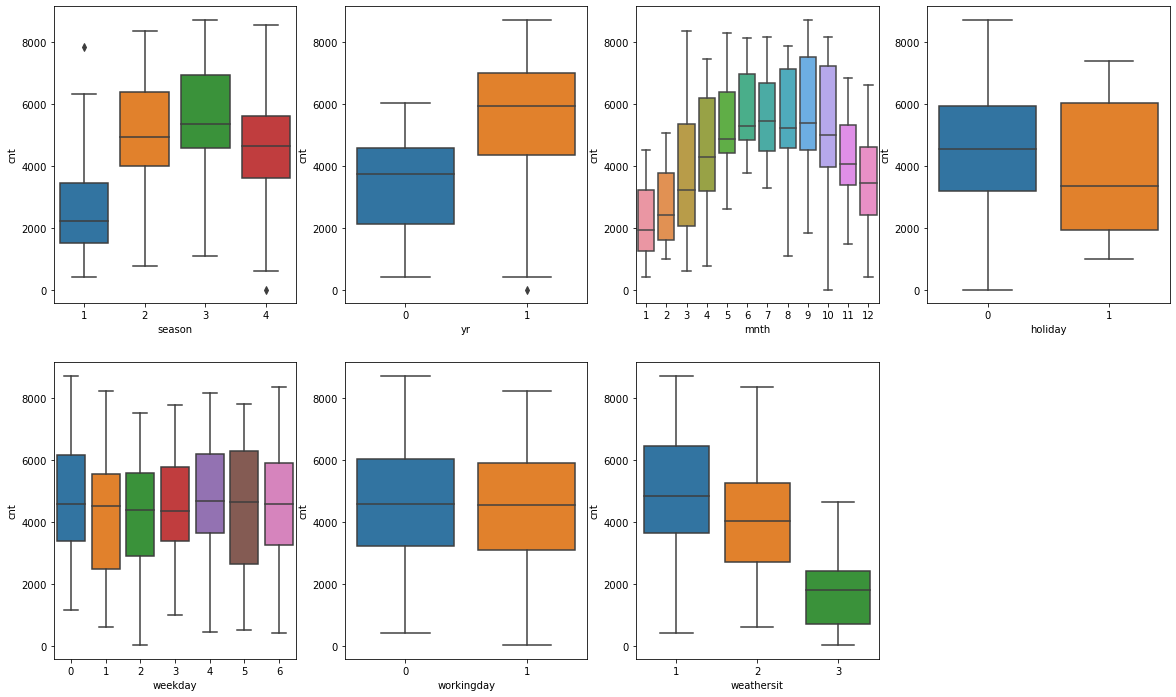

In [ ]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=df)

plt.subplot(2,4,2)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=df)

plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=df)

plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt', data=df)

plt.show()

#### Inference:

1. Season: 3:fall has highest demand for rental bikes
2. I see that demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

In [ ]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=df, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

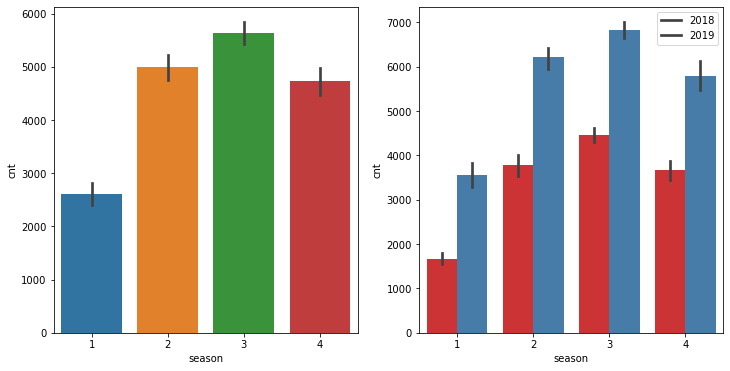

In [ ]:
# plotting visualization for season column

plot_cat_columns('season')

Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

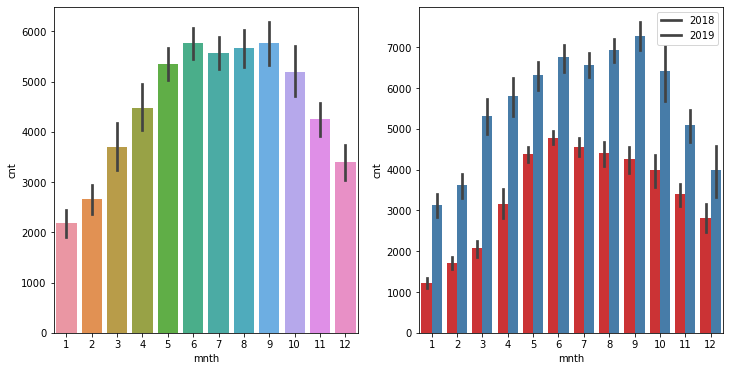

In [ ]:
# plotting visualization for month column

plot_cat_columns('mnth')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

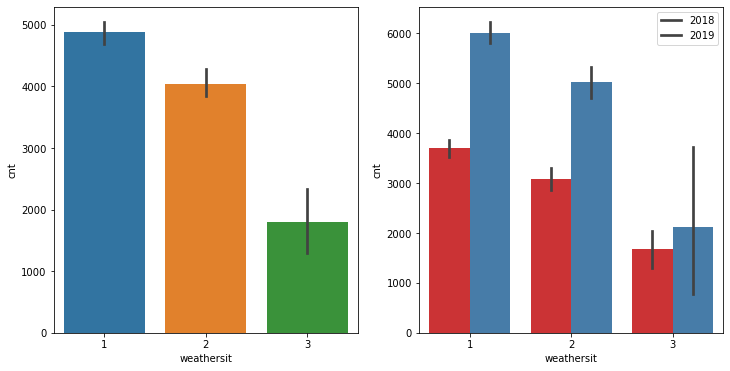

In [ ]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

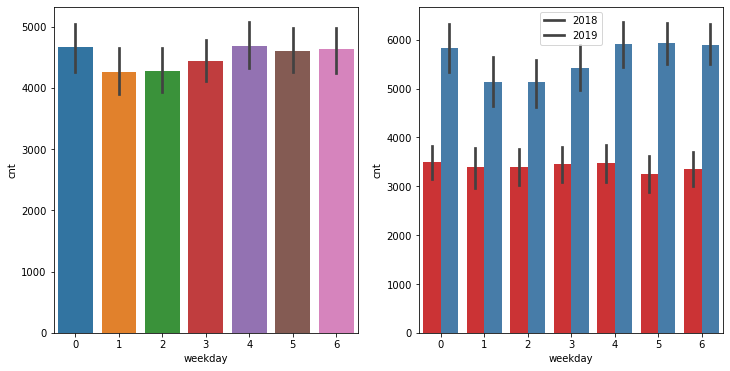

In [ ]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

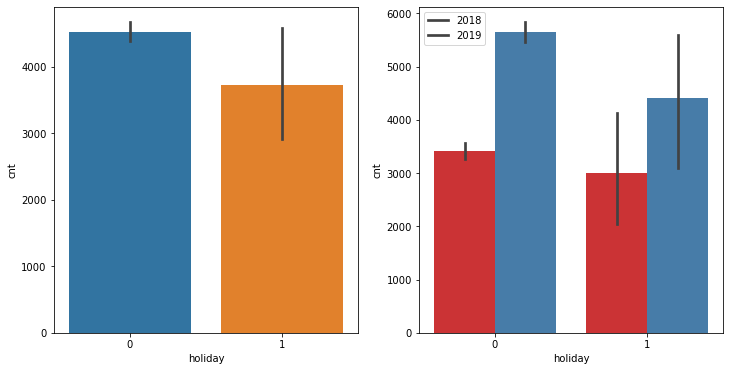

In [ ]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

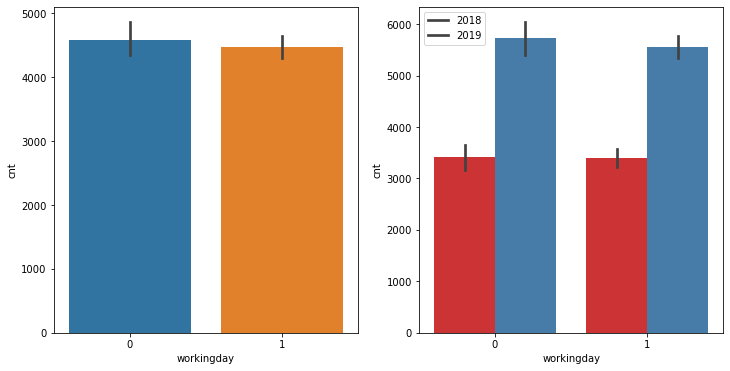

In [ ]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

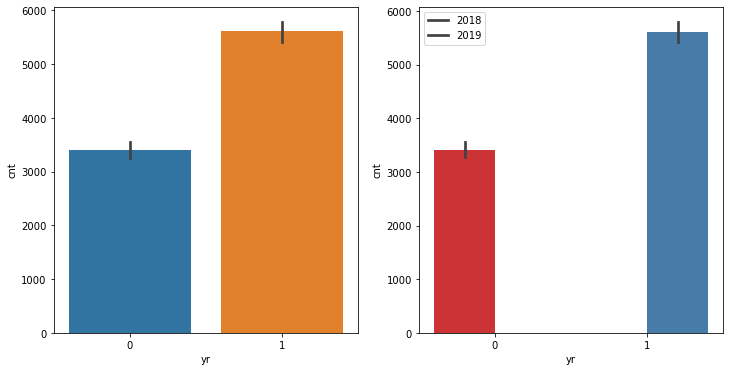

In [ ]:
# plotting visualization for year column

plot_cat_columns('yr')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

## correlation between numeric and categorical variable

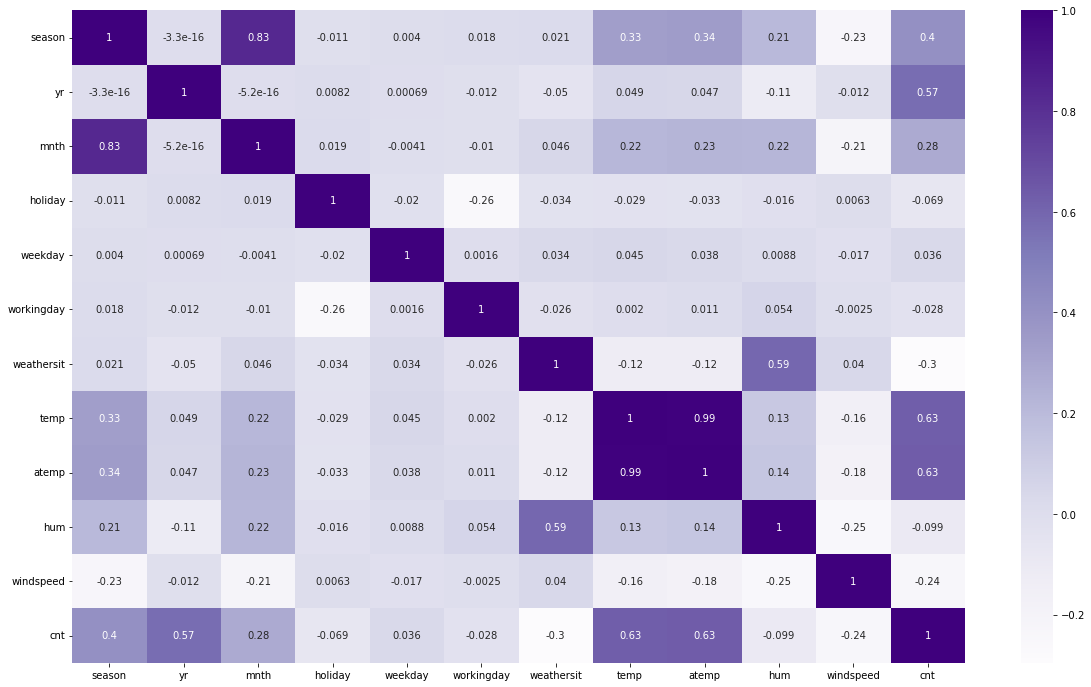

In [ ]:
plt.figure(figsize = (20, 12))
sns.heatmap(df.corr(), annot = True, cmap="Purples")
plt.show()

#### Insights:
- There is a correlation of 0.63 between cnt-temp and cnt-atemp
- There is a correlation of 0.99 between temp and atemp

# Step5: Data Preparation

### Dummy Variable

In [ ]:
# Creating DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.
# Convert to 'object' data type
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [ ]:
# creating dummy variables for 'mnth', 'weekday', 'season' & 'weathersit'
# dropping 1st dummy variable for each
# dropping the original columns

df=pd.get_dummies(data=df,drop_first=True)

df.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [ ]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


# Step6. Model Building
#### Split Data into training and test

In [ ]:
# We need to specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=1000)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [ ]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,0,0,34.200847,39.33065,48.8750,11.082939,5463,0,1,...,0,0,0,0,0,0,0,1,0,0
674,1,0,1,11.514153,14.07835,56.7083,11.625371,5686,0,0,...,1,0,0,0,1,0,0,0,0,0
477,1,0,1,13.188347,15.05625,76.6667,20.334232,3214,1,0,...,0,0,0,1,0,0,0,0,1,0
176,0,0,1,27.880000,31.88145,51.3333,6.333731,5305,0,1,...,0,0,0,1,0,0,0,0,0,0
655,1,0,1,21.422500,25.63125,72.8333,15.874779,7509,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 544 to 599
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [ ]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
310,0,0,1,16.195000,20.04355,75.8750,3.834075,4035,0,0,...,1,0,0,0,1,0,0,0,0,0
320,0,0,0,14.008347,16.16105,57.5833,20.459254,3053,0,0,...,1,0,0,0,0,0,0,1,1,0
189,0,0,1,30.066653,33.20790,60.9167,11.250104,5336,0,1,...,0,0,1,0,0,0,0,0,0,0
382,1,0,1,12.436653,13.76270,44.3333,27.833743,3376,0,0,...,0,0,0,0,0,0,1,0,0,0
388,1,0,1,14.042500,17.45540,83.5833,8.292389,4339,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null  

## Rescaling the Features

To make all features in same scale to interpret easily

- Min-Max scaling(normalisation): Between 0 and 1
- Standardisation(Mean-0, sigma-1)

This time i use MinMax scaling.

In [ ]:
# X
# normalisation (x-xmin)/(xmax-xmin)
# standardisation: (x - mu)/sigma

In [ ]:
# importing MinMaxScaler for rescalling

from sklearn.preprocessing import MinMaxScaler

In [ ]:
#1. Instantiate an object
scaler = MinMaxScaler()

# Create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#2. Fit on data
    ## fit(): learn xmin, xmax
    ## transform(): x-xmin/xmax-xmin
    ## fit_transform()

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,0,0,0.964059,0.926848,0.503649,0.294854,0.625978,0,1,...,0,0,0,0,0,0,0,1,0,0
674,1,0,1,0.240884,0.246245,0.584370,0.311545,0.651634,0,0,...,1,0,0,0,1,0,0,0,0,0
477,1,0,1,0.294252,0.272602,0.790039,0.579511,0.367234,1,0,...,0,0,0,1,0,0,0,0,1,0
176,0,0,1,0.762572,0.726076,0.528982,0.148724,0.607800,0,1,...,0,0,0,1,0,0,0,0,0,0
655,1,0,1,0.556729,0.557620,0.750536,0.442296,0.861367,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.025490,0.682353,0.522749,0.507177,0.650813,0.347478,0.514357,0.266667,0.250980,...,0.076471,0.080392,0.143137,0.145098,0.141176,0.131373,0.143137,0.149020,0.347059,0.027451
std,0.500491,0.157763,0.466018,0.239351,0.219530,0.145303,0.161325,0.220019,0.442651,0.434003,...,0.266010,0.272166,0.350557,0.352545,0.348545,0.338139,0.350557,0.356457,0.476502,0.163554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.318212,0.323000,0.540738,0.232053,0.367234,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.522966,0.518051,0.655431,0.328844,0.513921,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732894,0.690137,0.754508,0.435596,0.676542,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


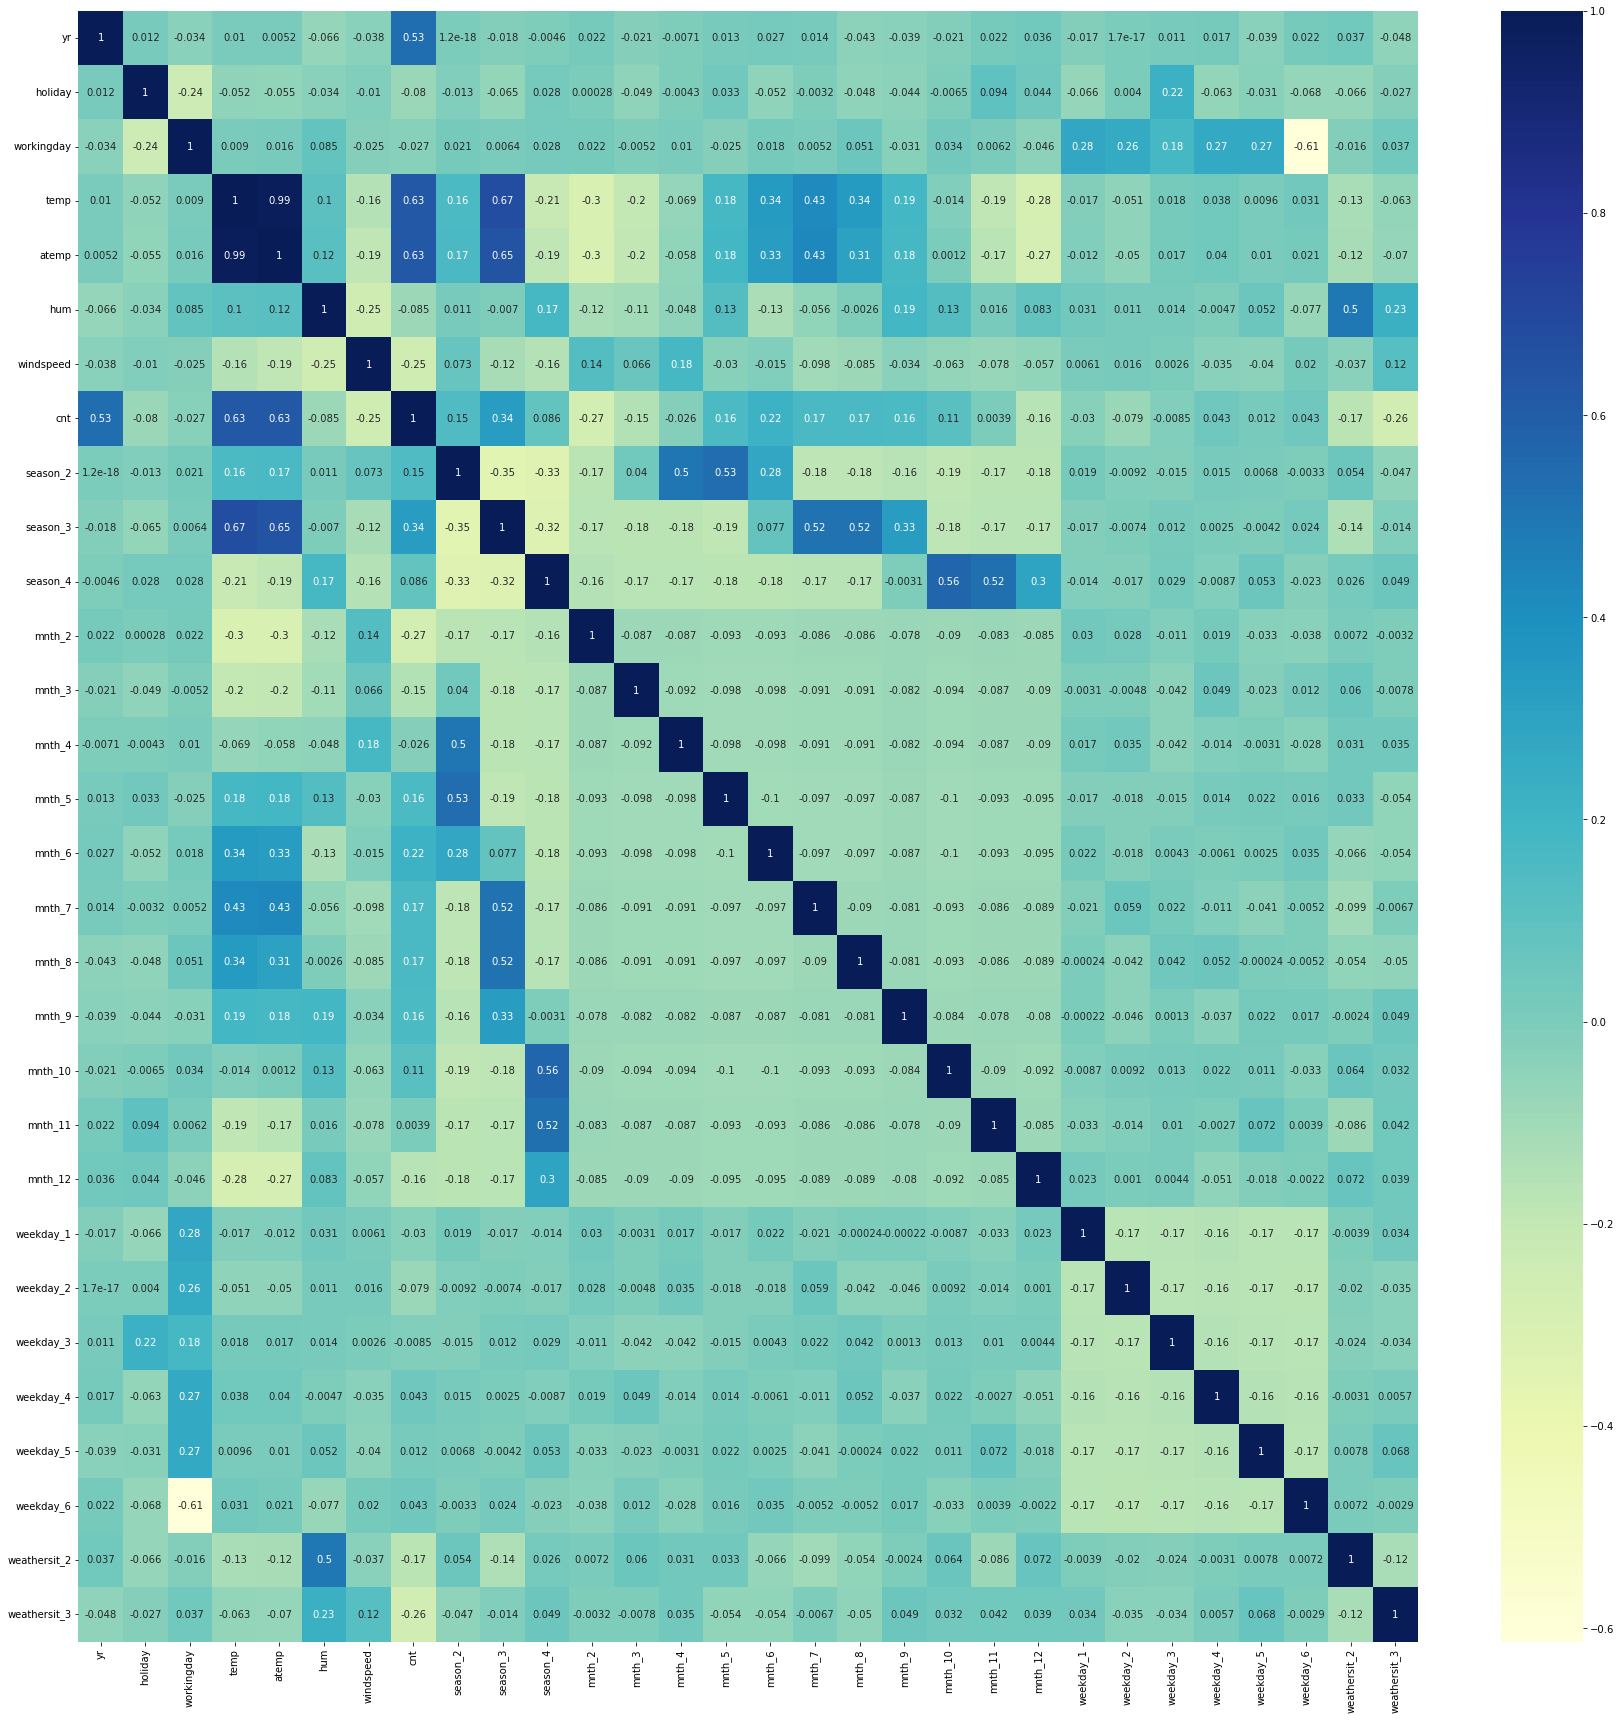

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

### Dividing into X and Y sets for the model building

In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

In [ ]:
X_train.shape

(510, 29)

In [ ]:
y_train.shape

(510,)

##### using RFE and statsmodel method combined for optimum final model

In [ ]:
# Using RFE method for variable selection
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 10),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 6),
 ('mnth_4', False, 7),
 ('mnth_5', False, 5),
 ('mnth_6', False, 8),
 ('mnth_7', False, 15),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', False, 13),
 ('mnth_12', False, 11),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 14),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

𝑉𝐼𝐹𝑖=1/1−𝑅i2

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,35.13
2,temp,18.32
3,hum,11.33
9,weekday_1,8.78
13,weekday_5,8.57
10,weekday_2,8.50
12,weekday_4,8.16
11,weekday_3,7.16
6,season_3,6.64
4,windspeed,4.26


In [ ]:
#BUILDING MODEL USING STATSMODEL:
import statsmodels.api as sm

# Adding a constant variable
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create linear model
lr1=sm.OLS(y_train,X_train_lm1)

#fit
lr1 = lr1.fit()

#Let's see the summary of our linear model
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     154.8
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          1.15e-175
Time:                        23:10:39   Log-Likelihood:                 492.86
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     494   BIC:                            -886.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2999      0.028     10.810      0.000       0.245       0.354
yr               0.2242      0.008     26.871      0.000       0.208       0.241
workingday       0.0920      0.030      3.093      0.002       0.034       0.150
temp             0.4987      0.032     15.742      0.000       0.436       0.561
hum             -0.2750      0.032     -8.601      0.000      -0.338      -0.212
windspeed       -0.1627      0.028     -5.830      0.000      -0.218      -0.108
season_2         0.1160      0.015      7.505      0.000       0.086       0.146
season_3         0.0568      0.021      2.667      0.008       0.015       0.099
season_4         0.1762      0.013     13.058      0.000       0.150       0.203
mnth_9           0.1002      0.018      5.596      0.000       0.065       0.135
weekday_1       -0.1011      0.033     -3.101      0.002      -0.165      -0.037
weekday_2       -0.1208      0.032     -3.794      0.000      -0.183      -0.058
weekday_3       -0.1106      0.030     -3.732      0.000      -0.169      -0.052
weekday_4       -0.0949      0.033     -2.893      0.004      -0.159      -0.030
weekday_5       -0.0899      0.032     -2.792      0.005      -0.153      -0.027
weathersit_3    -0.2151      0.027     -8.039      0.000      -0.268      -0.163
==============================================================================
Omnibus:                       62.510   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.710
Skew:                          -0.717   Prob(JB):                     6.14e-27
Kurtosis:                       4.904   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

you will use two main parameters to judge the insignificant variables, the p-values and the VIFs.

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop

- Decided to drop 'hum' due to high VIF.
- Keeping 'temp' as temperature could be an important factor for a business like bike rentals. We will check this further

In [ ]:
X_train_rfe2 = X_train_rfe.drop(["hum"], axis = 1)

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,35.13
2,temp,14.59
8,weekday_1,8.69
12,weekday_5,8.49
9,weekday_2,8.39
11,weekday_4,8.10
10,weekday_3,7.09
5,season_3,6.46
4,season_2,3.71
3,windspeed,3.66


In [ ]:
# Adding a constant variable
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Running the linear model
lr2=sm.OLS(y_train,X_train_lm2).fit()

#Let's see the summary of our linear model
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.0
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          7.24e-162
Time:                        23:10:41   Log-Likelihood:                 457.28
No. Observations:                 510   AIC:                            -884.6
Df Residuals:                     495   BIC:                            -821.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1194      0.019      6.143      0.000       0.081       0.158
yr               0.2289      0.009     25.657      0.000       0.211       0.246
workingday       0.0837      0.032      2.627      0.009       0.021       0.146
temp             0.4676      0.034     13.870      0.000       0.401       0.534
windspeed       -0.1004      0.029     -3.479      0.001      -0.157      -0.044
season_2         0.1148      0.017      6.932      0.000       0.082       0.147
season_3         0.0739      0.023      3.250      0.001       0.029       0.119
season_4         0.1661      0.014     11.534      0.000       0.138       0.194
mnth_9           0.0696      0.019      3.702      0.000       0.033       0.107
weekday_1       -0.0991      0.035     -2.839      0.005      -0.168      -0.031
weekday_2       -0.1208      0.034     -3.541      0.000      -0.188      -0.054
weekday_3       -0.1090      0.032     -3.435      0.001      -0.171      -0.047
weekday_4       -0.0893      0.035     -2.540      0.011      -0.158      -0.020
weekday_5       -0.0866      0.035     -2.511      0.012      -0.154      -0.019
weathersit_3    -0.2757      0.028     -9.967      0.000      -0.330      -0.221
==============================================================================
Omnibus:                       63.342   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.697
Skew:                          -0.774   Prob(JB):                     4.11e-24
Kurtosis:                       4.635   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Decided to drop 'season_3' due to high VIF.

In [ ]:
X_train_rfe3=X_train_rfe2.drop(['season_3'],axis=1)

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,34.83
7,weekday_1,8.61
11,weekday_5,8.42
8,weekday_2,8.34
10,weekday_4,8.02
9,weekday_3,7.04
2,temp,4.02
3,windspeed,3.50
0,yr,1.88
4,season_2,1.60


In [ ]:
# Adding a constant
X_train_lm3=sm.add_constant(X_train_rfe3)

# Running the linear model
lr3=sm.OLS(y_train,X_train_lm3).fit()

# Summary
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          1.05e-160
Time:                        23:10:43   Log-Likelihood:                 451.90
No. Observations:                 510   AIC:                            -875.8
Df Residuals:                     496   BIC:                            -816.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1105      0.019      5.686      0.000       0.072       0.149
yr               0.2275      0.009     25.293      0.000       0.210       0.245
workingday       0.0926      0.032      2.890      0.004       0.030       0.156
temp             0.5558      0.020     27.536      0.000       0.516       0.595
windspeed       -0.1071      0.029     -3.683      0.000      -0.164      -0.050
season_2         0.0744      0.011      6.739      0.000       0.053       0.096
season_4         0.1380      0.012     11.869      0.000       0.115       0.161
mnth_9           0.0831      0.019      4.493      0.000       0.047       0.120
weekday_1       -0.1074      0.035     -3.056      0.002      -0.176      -0.038
weekday_2       -0.1272      0.034     -3.699      0.000      -0.195      -0.060
weekday_3       -0.1160      0.032     -3.629      0.000      -0.179      -0.053
weekday_4       -0.0987      0.035     -2.792      0.005      -0.168      -0.029
weekday_5       -0.0942      0.035     -2.712      0.007      -0.163      -0.026
weathersit_3    -0.2724      0.028     -9.761      0.000      -0.327      -0.218
==============================================================================
Omnibus:                       57.543   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.326
Skew:                          -0.740   Prob(JB):                     1.47e-20
Kurtosis:                       4.451   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Need to drop workingday due to high VIF

In [ ]:
X_train_rfe4=X_train_rfe3.drop(['workingday'],axis=1)

In [ ]:
# Checking VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.88
1,temp,4.02
2,windspeed,3.50
3,season_2,1.60
4,season_4,1.35
5,mnth_9,1.17
6,weekday_1,1.39
7,weekday_2,1.38
8,weekday_3,1.40
9,weekday_4,1.37


In [ ]:
# adding constant
X_train_lm4=sm.add_constant(X_train_rfe4)

# fiiting and running the model
lr4=sm.OLS(y_train,X_train_lm4).fit()

# Summary
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     156.3
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          5.06e-160
Time:                        23:10:45   Log-Likelihood:                 447.64
No. Observations:                 510   AIC:                            -869.3
Df Residuals:                     497   BIC:                            -814.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1078      0.020      5.516      0.000       0.069       0.146
yr               0.2266      0.009     25.019      0.000       0.209       0.244
temp             0.5583      0.020     27.478      0.000       0.518       0.598
windspeed       -0.1033      0.029     -3.530      0.000      -0.161      -0.046
season_2         0.0752      0.011      6.764      0.000       0.053       0.097
season_4         0.1386      0.012     11.837      0.000       0.116       0.162
mnth_9           0.0850      0.019      4.562      0.000       0.048       0.122
weekday_1       -0.0148      0.015     -1.017      0.309      -0.043       0.014
weekday_2       -0.0369      0.014     -2.547      0.011      -0.065      -0.008
weekday_3       -0.0337      0.015     -2.305      0.022      -0.062      -0.005
weekday_4       -0.0060      0.015     -0.402      0.688      -0.036       0.023
weekday_5       -0.0030      0.015     -0.202      0.840      -0.032       0.026
weathersit_3    -0.2716      0.028     -9.661      0.000      -0.327      -0.216
==============================================================================
Omnibus:                       62.959   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.774
Skew:                          -0.795   Prob(JB):                     1.31e-22
Kurtosis:                       4.488   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Need to drop 'weekday_1' due to high p-value

In [ ]:
X_train_rfe5=X_train_rfe4.drop(['weekday_1'],axis=1)

In [ ]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe5.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.85
2,windspeed,3.35
3,season_2,1.60
4,season_4,1.34
5,mnth_9,1.17
6,weekday_2,1.28
7,weekday_3,1.29
8,weekday_4,1.27
9,weekday_5,1.29


In [ ]:
# adding constant
X_train_lm5=sm.add_constant(X_train_rfe5)

# fitting and running model
lr5=sm.OLS(y_train,X_train_lm5).fit()

# summary
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     170.4
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          6.33e-161
Time:                        23:10:46   Log-Likelihood:                 447.11
No. Observations:                 510   AIC:                            -870.2
Df Residuals:                     498   BIC:                            -819.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1026      0.019      5.440      0.000       0.066       0.140
yr               0.2268      0.009     25.047      0.000       0.209       0.245
temp             0.5585      0.020     27.494      0.000       0.519       0.598
windspeed       -0.1026      0.029     -3.507      0.000      -0.160      -0.045
season_2         0.0749      0.011      6.742      0.000       0.053       0.097
season_4         0.1386      0.012     11.832      0.000       0.116       0.162
mnth_9           0.0853      0.019      4.580      0.000       0.049       0.122
weekday_2       -0.0321      0.014     -2.343      0.020      -0.059      -0.005
weekday_3       -0.0289      0.014     -2.088      0.037      -0.056      -0.002
weekday_4       -0.0012      0.014     -0.084      0.933      -0.029       0.027
weekday_5        0.0019      0.014      0.140      0.889      -0.025       0.029
weathersit_3    -0.2728      0.028     -9.713      0.000      -0.328      -0.218
==============================================================================
Omnibus:                       62.965   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.199
Skew:                          -0.793   Prob(JB):                     1.06e-22
Kurtosis:                       4.498   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping weekday_4 due to high p-value

In [ ]:
X_train_rfe6=X_train_rfe5.drop(['weekday_4'],axis=1)

In [ ]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe6.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.70
2,windspeed,3.31
3,season_2,1.60
4,season_4,1.33
5,mnth_9,1.17
6,weekday_2,1.22
7,weekday_3,1.23
8,weekday_5,1.23
9,weathersit_3,1.06


In [ ]:
# adding constant
X_train_lm6=sm.add_constant(X_train_rfe6)

# fitting and running model
lr6=sm.OLS(y_train,X_train_lm6).fit()

# summary
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     187.8
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          4.52e-162
Time:                        23:10:48   Log-Likelihood:                 447.10
No. Observations:                 510   AIC:                            -872.2
Df Residuals:                     499   BIC:                            -825.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1023      0.019      5.513      0.000       0.066       0.139
yr               0.2268      0.009     25.072      0.000       0.209       0.245
temp             0.5585      0.020     27.538      0.000       0.519       0.598
windspeed       -0.1025      0.029     -3.510      0.000      -0.160      -0.045
season_2         0.0749      0.011      6.748      0.000       0.053       0.097
season_4         0.1385      0.012     11.843      0.000       0.116       0.162
mnth_9           0.0854      0.019      4.595      0.000       0.049       0.122
weekday_2       -0.0318      0.013     -2.395      0.017      -0.058      -0.006
weekday_3       -0.0286      0.013     -2.131      0.034      -0.055      -0.002
weekday_5        0.0022      0.013      0.165      0.869      -0.024       0.029
weathersit_3    -0.2728      0.028     -9.725      0.000      -0.328      -0.218
==============================================================================
Omnibus:                       62.780   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.823
Skew:                          -0.792   Prob(JB):                     1.28e-22
Kurtosis:                       4.496   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping feature 'weekday_5' due to high p-value

In [ ]:
X_train_rfe7=X_train_rfe6.drop(['weekday_5'],axis=1)

In [ ]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe7.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe7.values,i) for i in range(X_train_rfe7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.62
2,windspeed,3.28
3,season_2,1.59
4,season_4,1.31
5,mnth_9,1.17
6,weekday_2,1.18
7,weekday_3,1.19
8,weathersit_3,1.06


In [ ]:
# adding constant
X_train_lm7=sm.add_constant(X_train_rfe7)

# fitting and running model
lr7=sm.OLS(y_train,X_train_lm7).fit()

# summary
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          3.08e-163
Time:                        23:10:50   Log-Likelihood:                 447.09
No. Observations:                 510   AIC:                            -874.2
Df Residuals:                     500   BIC:                            -831.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1028      0.018      5.610      0.000       0.067       0.139
yr               0.2267      0.009     25.107      0.000       0.209       0.244
temp             0.5585      0.020     27.567      0.000       0.519       0.598
windspeed       -0.1027      0.029     -3.522      0.000      -0.160      -0.045
season_2         0.0750      0.011      6.761      0.000       0.053       0.097
season_4         0.1386      0.012     11.881      0.000       0.116       0.162
mnth_9           0.0854      0.019      4.602      0.000       0.049       0.122
weekday_2       -0.0323      0.013     -2.479      0.014      -0.058      -0.007
weekday_3       -0.0290      0.013     -2.210      0.028      -0.055      -0.003
weathersit_3    -0.2726      0.028     -9.741      0.000      -0.328      -0.218
==============================================================================
Omnibus:                       62.758   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.658
Skew:                          -0.792   Prob(JB):                     1.39e-22
Kurtosis:                       4.493   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping weekday_3 due to high p-value

In [ ]:
X_train_rfe8=X_train_rfe7.drop(['weekday_3'],axis=1)

In [ ]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe8.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe8.values,i) for i in range(X_train_rfe8.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.57
2,windspeed,3.24
3,season_2,1.59
4,season_4,1.30
5,mnth_9,1.17
6,weekday_2,1.16
7,weathersit_3,1.06


In [ ]:
# adding constant
X_train_lm8=sm.add_constant(X_train_rfe8)

# fitting and running model
lr8=sm.OLS(y_train,X_train_lm8).fit()

# summary
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     232.8
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          2.20e-163
Time:                        23:10:51   Log-Likelihood:                 444.61
No. Observations:                 510   AIC:                            -871.2
Df Residuals:                     501   BIC:                            -833.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0989      0.018      5.404      0.000       0.063       0.135
yr               0.2265      0.009     24.990      0.000       0.209       0.244
temp             0.5576      0.020     27.423      0.000       0.518       0.598
windspeed       -0.1039      0.029     -3.551      0.000      -0.161      -0.046
season_2         0.0753      0.011      6.766      0.000       0.053       0.097
season_4         0.1379      0.012     11.777      0.000       0.115       0.161
mnth_9           0.0858      0.019      4.605      0.000       0.049       0.122
weekday_2       -0.0274      0.013     -2.130      0.034      -0.053      -0.002
weathersit_3    -0.2700      0.028     -9.619      0.000      -0.325      -0.215
==============================================================================
Omnibus:                       64.138   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.273
Skew:                          -0.793   Prob(JB):                     8.38e-24
Kurtosis:                       4.577   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping weekday_2 due to high p-value

In [ ]:
X_train_rfe9=X_train_rfe8.drop(['weekday_2'],axis=1)

In [ ]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe9.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe9.values,i) for i in range(X_train_rfe9.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.86
1,temp,3.55
2,windspeed,3.17
3,season_2,1.59
4,season_4,1.30
5,mnth_9,1.16
6,weathersit_3,1.06


In [ ]:
# adding constant
X_train_lm9=sm.add_constant(X_train_rfe9)

# fitting and running model
lr9=sm.OLS(y_train,X_train_lm9).fit()

# summary
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     263.6
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          1.24e-163
Time:                        23:10:54   Log-Likelihood:                 442.31
No. Observations:                 510   AIC:                            -868.6
Df Residuals:                     502   BIC:                            -834.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0936      0.018      5.145      0.000       0.058       0.129
yr               0.2266      0.009     24.908      0.000       0.209       0.244
temp             0.5596      0.020     27.450      0.000       0.520       0.600
windspeed       -0.1044      0.029     -3.556      0.000      -0.162      -0.047
season_2         0.0757      0.011      6.783      0.000       0.054       0.098
season_4         0.1386      0.012     11.800      0.000       0.116       0.162
mnth_9           0.0873      0.019      4.670      0.000       0.051       0.124
weathersit_3    -0.2678      0.028     -9.515      0.000      -0.323      -0.212
==============================================================================
Omnibus:                       63.854   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.351
Skew:                          -0.780   Prob(JB):                     2.96e-24
Kurtosis:                       4.633   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Insights:
- The Model 9 looks pretty decent with p-values significant and very low multicollinearity between the predictor variables.
- The R-squared and Adj. R-squared looks very good at 0.786 and 0.783 respectively.
- F-static is also large, stating a good fit of model.
- We will check the test data metrics to check whether this model is significant enough or not.

# Step7: Residual Analysis

now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.



In [ ]:
y_train_pred = lr9.predict(X_train_lm9)

Text(0.5, 0, 'Errors')

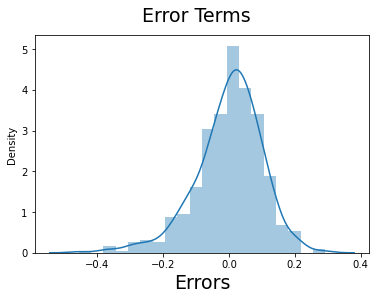

In [ ]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 19)                  # Plot heading
plt.xlabel('Errors', fontsize = 19)

From the plot, we could see that residuals are normally distributed and hence, our assumption for linear regression is valid

# Step8: Prediction and Evaluation on the Test Set


Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr9)

In [ ]:
#create a list of numeric vars
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# fit on dat
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
310,0,0,1,0.390094,0.407020,0.781880,0.071811,0.461689,0,0,...,1,0,0,0,1,0,0,0,0,0
320,0,0,0,0.320391,0.302378,0.593387,0.583358,0.348711,0,0,...,1,0,0,0,0,0,0,1,1,0
189,0,0,1,0.832275,0.761827,0.627737,0.299998,0.611367,0,1,...,0,0,1,0,0,0,0,0,0,0
382,1,0,1,0.270290,0.237738,0.456848,0.810267,0.385872,0,0,...,0,0,0,0,0,0,1,0,0,0
388,1,0,1,0.321479,0.337264,0.861313,0.208991,0.496664,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.036530,0.707763,0.518968,0.504278,0.638058,0.344287,0.519768,0.219178,0.273973,...,0.095890,0.095890,0.146119,0.136986,0.146119,0.168950,0.141553,0.127854,0.315068,0.031963
std,0.501140,0.188034,0.455833,0.240207,0.220975,0.149928,0.157137,0.229815,0.414637,0.447017,...,0.295115,0.295115,0.354034,0.344621,0.354034,0.375566,0.349389,0.334692,0.465607,0.176306
min,0.000000,0.000000,0.000000,-0.048868,-0.026641,0.261915,0.047450,0.069604,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.311133,0.310028,0.521742,0.230151,0.345950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.534946,0.530399,0.621726,0.320521,0.530028,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.721730,0.683135,0.738729,0.433733,0.699896,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.983663,0.950666,1.002146,0.864144,0.959503,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null  

In [ ]:
y_test

310    0.461689
320    0.348711
189    0.611367
382    0.385872
388    0.496664
         ...   
436    0.670156
657    0.928210
606    0.884837
417    0.546595
460    0.740681
Name: cnt, Length: 219, dtype: float64

In [ ]:
#Selecting the variables that were part of final model.
col_1=X_train_rfe9.columns
X_test=X_test[col_1]
# Adding constant variable to test dataframe
X_test_lm9 = sm.add_constant(X_test)
X_test_lm9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 9.4 KB


In [ ]:
# Predict
y_pred = lr9.predict(X_test_lm9)

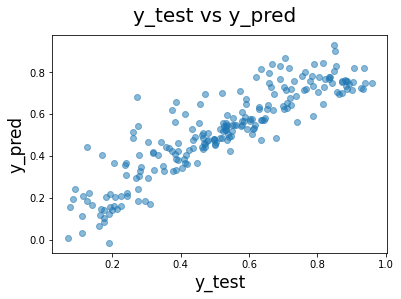

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.52)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 17)                          # X-label
plt.ylabel('y_pred', fontsize = 17)
plt.show()

#### R-Squared

In [ ]:
# evaluate
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.7996693605536901

#### Adjusted R-Squared

In [ ]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7930233203824855

### Final model equation
cnt = 0.0936 + (yr × 0.2266) + (temp × 0.5596) − (windspeed × 0.1044) + (season_2 × 0.0757) + (season_4 × 0.1386) + (mnth_9 × 0.0873) - (weathersit_3 × 0.2678)

### All predictor variables:
- yr

- temp

- windspeed

- season_2

- season_4

- mnth_9

- weathersit_3

### NOTE:
- yr : year
- temp : temperature
- mnth_9 : september
- weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- season_2: spring
- season_4: winter
### Top 3 most important predictor variables:
- Temperature (temp) - A coefficient value of ‘0.0936’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.0936 units.

- Year (yr) - A coefficient value of ‘0.2266’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2266 units.

- Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.2678’ indicated that, a unit increase in weathersit_3 variable decreases the bike hire numbers by 0.2678 units.

### Other important predictor variables to watchout for:
- season_4: - A coefficient value of ‘0.1386’ indicated a unit increase in season_4 variable increases the bike hire numbers by 0.1386 units.

- windspeed: - A coefficient value of ‘-0.1044’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1044 units.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>